In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('laptopData.csv')


In [3]:
df.shape

(1303, 12)

In [4]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


DATA CLEANING


In [6]:
df.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
df.drop(['Cpu'], axis=1, inplace=True)

In [8]:
df['Gpu'] = df['OpSys'] + df['Weight']

In [9]:
df[["Memory"]]

,Memory
0,128GB SSD
1,128GB Flash Storage
2,256GB SSD
3,512GB SSD
4,256GB SSD
...,...
1298,128GB SSD
1299,512GB SSD
1300,64GB Flash Storage
1301,1TB HDD


In [10]:
df.drop(['Ram','Memory'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Gpu               1273 non-null   object 
 6   OpSys             1273 non-null   object 
 7   Weight            1273 non-null   object 
 8   Price             1273 non-null   float64
dtypes: float64(2), object(7)
memory usage: 91.7+ KB


In [12]:
df.select_dtypes(include='number').describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [13]:
df['Gpu'].mode()

0    Windows 102.2kg
Name: Gpu, dtype: object

In [14]:
df['Gpu'].replace("Intel Iris Plus Graphics 640","Intel HD Graphics 6000", inplace=True)

In [15]:
df['Gpu'].mode()

0    Windows 102.2kg
Name: Gpu, dtype: object

In [16]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


DAtA VISULIZATION

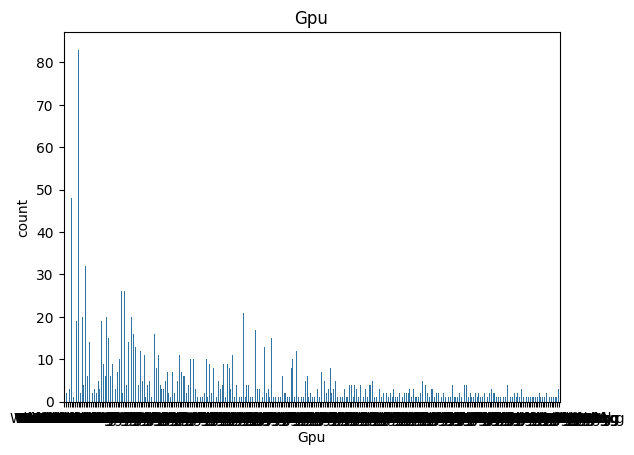

In [17]:
sns.countplot(x = 'Gpu', data = df, width = 0.5)
plt.title("Gpu")
plt.show()


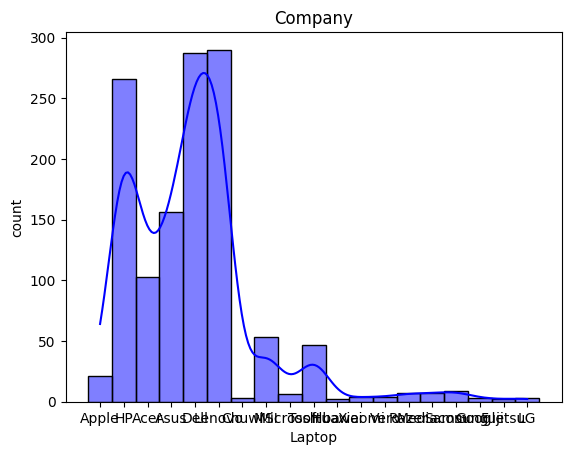

In [18]:
sns.histplot(df['Company'], bins = 50, kde = True, color = 'b')
plt.title('Company')
plt.xlabel('Laptop')
plt.ylabel('count')
plt.show()

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x="Ram", y="Price", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("RAM vs Average Price")
plt.show()


ValueError: Could not interpret value `Ram` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>